# LIBRARY IMPORT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,accuracy_score,recall_score,precision_score, log_loss, brier_score_loss,mean_squared_error
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

# DATA IMPORT & EXPLORATION

In [2]:
rew = pd.read_csv('./reviews.csv')
lis = pd.read_csv('./listings.csv')
cal = pd.read_csv('./calendar.csv')

In [3]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [4]:
lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [5]:
# number of rows and columns
print('number of rows: ',lis.shape[0])
print('number of columns: ',lis.shape[1])

number of rows:  3585
number of columns:  95


In [6]:
# data types of columns
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [7]:
# column names
lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [8]:
# see unique values of the interaction column
lis.interaction.unique()

array([nan,
       'If I am at home, I am likely working in my home office, which is a separate room. I can help you settle in and give you tips and directions on the neighborhood and Boston. ',
       'ABOUT ME: I\'m a laid-back, friendly, unmarried guy. I work from home, spending a lot of time on the computer. I have an website that sells handmade things from Mexico. It is called "Viva Oaxaca Folk Art." You will see lots of folk art in the apartment. I also run websites for other small companies. I don’t smoke, don’t have overnight guests. I keep regular hours, am friendly, considerate and quiet. I am one of the original Boston AIRBNB hosts, having signed-up with them in 2008.   I am a big traveler myself, and I love hearing stories of where guests have been or where they are heading to next. ',
       ...,
       'Hosts will be available over phone, text and email, will be located a short distance away.',
       "We're happy to assist with any necessity and help with any area recomm

In [9]:
# see unique values of the access column
lis.access.unique()

array(['You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.',
       'Apt has one more bedroom (which I use) and large living space and kitchen that you can use.  Possibility to do laundry. Two porches.',
       "I am living in the apartment during your stay, and I work from home, so I'm there most of the time.  Guests are welcome to use the kitchen and all cooking utensils, refrigerator, etc. I have a gas stove, toaster oven, microwave, convection oven and a pressure cooker! I have a backyard garden, so if you are here during August and September, be prepared for tomatoes and cucumbers! In addition to your personal room, you can also use the living room which includes a 32-inch HDTV with an Apple TV connection.  The bathroom, adjacent to your room, is shared.  The only room that is off limits is my bedroom on the opposite side of the apartment. I have a clothes washer and dryer in the basement for your use. ",
       ...,
       'Kitchen/ Living Room/ Balc

In [10]:
# see unique values of the house_rules column
lis.house_rules.unique()

array(["Clean up and treat the home the way you'd like your home to be treated.  No smoking.",
       'Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. I have a cute and quiet mixed chihuahua. I could accept more guests (for an extra fee) but this also needs to be confirmed beforehand. Also friends traveling together could sleep in separate beds for an extra fee (the second bed is either a sofa bed or inflatable bed). Smoking is only allowed on the porch.',
       "I encourage you to use my kitchen, cooking and laundry facilities. There is no additional charge to use the washer/dryer in the basement.  No smoking, inside or outside. Come home as late as you want.  If you come home stumbling drunk, it's OK the first time. If you do it again, and you wake up me or the neighbors downstairs, we will be annoyed.  (Just so you know . . . )",
       ...,
       'Please know this is my 2 bedroom condo that I live in full time. I am happy to allow a

# CONVERT SOME NUMERIC COLUMNS to FLOAT

In [11]:
'''def dollar_to_float(df,col_list):
    for col in col_list:
        for i in range(0, df[col].shape[0]):
            if ',' in df[col][i]:
                df[col][i]=df[col][i].replace(',','')
            df[col][i] = df[col][i][1:]
        df[col] = df[col].astype('float')'''

"def dollar_to_float(df,col_list):\n    for col in col_list:\n        for i in range(0, df[col].shape[0]):\n            if ',' in df[col][i]:\n                df[col][i]=df[col][i].replace(',','')\n            df[col][i] = df[col][i][1:]\n        df[col] = df[col].astype('float')"

In [12]:
# this function converts columns with $ or % symbols to float.
def dollar_to_float(df,col, ch):
    for i in range(0, df[col].shape[0]):
        if isinstance(df[col][i], str):
            df[col][i]=df[col][i].replace(',','')
            if ch == '$':
                df[col][i] = df[col][i][1:]
            elif ch == '%':
                df[col][i] = df[col][i][:-1]
    df[col] = df[col].astype('float')

In [13]:
# this function gets the columns which has "price or fee" keyword
def get_columns_with_price_keyword():
    has_price = []
    for a in lis.columns:
        if 'price' in a or 'fee' in a:
            has_price.append(a)
    return has_price

In [14]:
# generating list with price keyword
has_price = get_columns_with_price_keyword()
has_price

['square_feet', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee']

In [15]:
lis[has_price].head()

,square_feet,price,weekly_price,monthly_price,cleaning_fee
0,NaN,$250.00,NaN,NaN,$35.00
1,NaN,$65.00,$400.00,NaN,$10.00
2,NaN,$65.00,$395.00,"$1,350.00",NaN
3,NaN,$75.00,NaN,NaN,$50.00
4,NaN,$79.00,NaN,NaN,$15.00


In [16]:
# converting numeric columns to float
dollar_to_float(lis, 'price','$')
dollar_to_float(lis, 'weekly_price','$')
dollar_to_float(lis, 'monthly_price','$')
dollar_to_float(lis, 'cleaning_fee', '$')
dollar_to_float(lis, 'extra_people', '$')
dollar_to_float(lis, 'security_deposit', '$')
dollar_to_float(lis, 'host_acceptance_rate', '%')
dollar_to_float(lis, 'host_response_rate', '%')

C:\Users\tcserkilic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\tcserkilic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tcserkilic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Check Correlation With Price and Drop Highly Correlated Ones

In [17]:
#check correlation
print('corr between monthly & price:', lis.monthly_price.corr(lis.price))
print('corr between weekly & price:', lis.weekly_price.corr(lis.price))

corr between monthly & price: 0.8594261984782301
corr between weekly & price: 0.9192837916810579


In [18]:
drop_list = []
for a in lis.columns:
    if lis[a].dtype != object:
        if lis[a].corr(lis.price) > 0.7:
            drop_list.append(a)

In [19]:
drop_list

['price', 'weekly_price', 'monthly_price']

In [20]:
drop_list.remove('price')

In [21]:
drop_list

['weekly_price', 'monthly_price']

In [22]:
# dropping columns which is highly correlated with out target variable (price)
lis.drop(columns=drop_list, inplace=True, axis=1)

## Check Null Values For Some Columns

In [23]:
# check null values
lis['price'].isnull().mean()

0.0

In [24]:
# check null values
lis['cleaning_fee'].isnull().mean()

0.3087866108786611

In [25]:
# fill null values with mean
lis['cleaning_fee'].fillna((lis['cleaning_fee'].mean()), inplace=True)

## Check Negative Values

In [26]:
def check_negatives(df):
    #this func checks whether  a column of a dataframe has negative values or not.
    neg_list = []
    for col in df.select_dtypes(include=['float', 'int']).columns:
        for i in range(0, df[col].shape[0]):
            if df[col][i] < 0:
                if col not in neg_list:
                    neg_list.append(col)
    return neg_list            

In [27]:
negative_list = check_negatives(lis)

In [28]:
negative_list

['longitude']

# Is There A Correlation Between Review Scores Ratings and Bed_Type

In [29]:
lis.groupby(by=['bed_type'])['review_scores_rating'].count()

bed_type
Airbed             29
Couch               6
Futon              48
Pull-out Sofa      27
Real Bed         2662
Name: review_scores_rating, dtype: int64

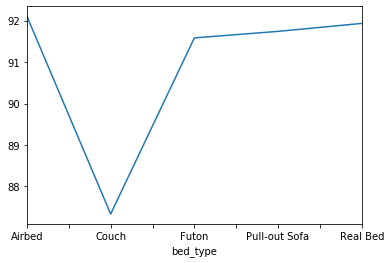

In [30]:
#lis['bed_type'].unique()
lis.groupby(by=['bed_type'])['review_scores_rating'].mean().plot()

Although there are not many comments about Couches we can say that people who accommodated at Couch, rated lower than others.

# Do The Hosts of Homes With High Prices Respond Faster Than Others

In [31]:
lis['host_response_time'].unique()

array([nan, 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [32]:
lis.groupby(by = ['host_response_time'])['price'].count()

host_response_time
a few days or more      43
within a day           469
within a few hours    1218
within an hour        1384
Name: price, dtype: int64

In [33]:
lis.groupby(by = ['host_response_time'])['price'].mean()

host_response_time
a few days or more    150.627907
within a day          155.127932
within a few hours    190.050082
within an hour        160.638728
Name: price, dtype: float64

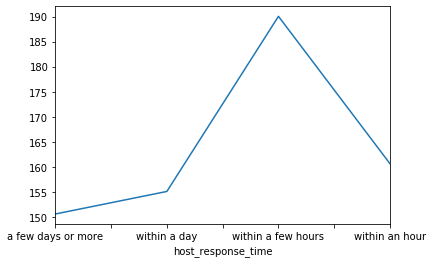

In [34]:
lis.groupby(by = ['host_response_time'])['price'].mean().plot()

It can be seen from the graph that hosts who has homes with high prices are respond faster than others

# Does The Property Type Affect The Price ?

In [35]:
lis.groupby(by=['property_type'])['price'].count()

property_type
Apartment          2612
Bed & Breakfast      41
Boat                 12
Camper/RV             1
Condominium         231
Dorm                  2
Entire Floor          4
Guesthouse            1
House               562
Loft                 39
Other                17
Townhouse            54
Villa                 6
Name: price, dtype: int64

In [36]:
lis.groupby(by = ['property_type'])['price'].mean().sort_values()

property_type
Camper/RV           60.000000
Dorm                62.500000
Entire Floor       122.000000
Bed & Breakfast    129.365854
House              131.599644
Townhouse          149.037037
Apartment          181.966692
Loft               185.410256
Villa              189.500000
Condominium        190.246753
Other              229.941176
Boat               268.833333
Guesthouse         289.000000
Name: price, dtype: float64

Yes, it can be clearly seen that property type affects the price.

# CAN WE PREDICT THE PRICE OF THE HOUSE ? (What are the 3 main features that affect the price of the house ?)

In [37]:
lis.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100.0,100.0,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,M

Let's start with dropping some columns

## DROP COLUMNS

### Drop ID Columns

In [38]:
def has_id_column(lis):
    has_id = []
    for a in lis.columns:
        if 'id' in a:
            has_id.append(a)
    return has_id

In [39]:
has_id = has_id_column(lis)
has_id

['id', 'scrape_id', 'host_id', 'host_identity_verified']

In [40]:
has_id.remove('host_identity_verified')

In [41]:
# because we will not use these fields while setting model, we are dropping them.
lis.drop(axis=1, columns=has_id, inplace=True)

In [42]:
lis.head(1)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


### Drop Url Columns

In [43]:
def has_url_column(lis):
    has_url = []
    for a in lis.columns:
        if 'url' in a:
            has_url.append(a)
    return has_url

In [44]:
has_url = has_url_column(lis)
has_url

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [45]:
for i in has_url:
    print(lis[i].isnull().mean(), i)

0.0 listing_url
0.16708507670850767 thumbnail_url
0.16708507670850767 medium_url
0.0 picture_url
0.16708507670850767 xl_picture_url
0.0 host_url
0.0 host_thumbnail_url
0.0 host_picture_url


In [46]:
# Because we will not use these text data, we are dropping them.
lis.drop(axis=1, columns=has_url, inplace=True)

In [47]:
lis.head(1)

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


### Drop Host Columns

In [48]:
def has_host_column(lis):
    has_host = []
    for a in lis.columns:
        if 'host' in a:
            has_host.append(a)
    return has_host

In [49]:
has_host = has_host_column(lis)
has_host

['host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count']

In [50]:
# just keeping numerical or boolean data in has_host list.
rm_from_drop_list = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
                     'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 
                     'calculated_host_listings_count', 'host_has_profile_pic']
for a in rm_from_drop_list:
    has_host.remove(a)

In [51]:
has_host

['host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_neighbourhood',
 'host_verifications']

In [52]:
# dropping columns which will not be used.
lis.drop(axis=1, columns=has_host, inplace=True)

In [53]:
lis.head(1)

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,f,1,1,t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


### Columns With One Distinct Element

In [54]:
def get_columns_with_one_element(lis):
    col_with_one_element = []
    for c in lis.columns:
        if len(lis[c].unique()) == 1:
            col_with_one_element.append(c)
    return col_with_one_element

In [55]:
col_with_one_element = get_columns_with_one_element(lis)
col_with_one_element

['last_scraped',
 'experiences_offered',
 'neighbourhood_group_cleansed',
 'state',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'license',
 'jurisdiction_names']

In [56]:
# drop columns with just one element which will not help developing model.
lis.drop(columns=col_with_one_element, axis=1, inplace=True)

In [57]:
lis.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,f,1,1,t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN


### Drop Unnecessary Columns

In [58]:
lis.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,f,1,1,t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN


In [59]:
unnecessary_columns = ['name', 'summary','space','description', 'neighborhood_overview', 'notes', 'transit', 'access', 
                   'interaction', 'house_rules', 'street', 'neighbourhood', 'city', 'neighbourhood_cleansed',
                   'smart_location', 'latitude', 'longitude', 'amenities', 'calendar_updated', 'market', 'zipcode',
                   'first_review', 'last_review']

In [60]:
lis[unnecessary_columns].head(3)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,street,neighbourhood,city,neighbourhood_cleansed,smart_location,latitude,longitude,amenities,calendar_updated,market,zipcode,first_review,last_review
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,Roslindale,"Boston, MA",42.282619,-71.133068,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",2 weeks ago,Boston,02131,NaN,NaN
1,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,Roslindale,"Boston, MA",42.286241,-71.134374,"{TV,Internet,""Wireless Internet"",""Air Conditio...",a week ago,Boston,02131,2014-06-01,2016-08-13
2,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...","Ardale St., Boston, MA 02131, United States",Roslindale,Boston,Roslindale,"Boston, MA",42.292438,-71.135765,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",5 days ago,Boston,02131,2009-07-19,2016-08-05


In [61]:
# in real life scenario we could have used some values from this column.but for now we will drop this column too.
lis.amenities.unique()

array(['{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}',
       '{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets Allowed","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door",Hangers,"Hair Dryer",Iron}',
       '{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card",Essentials,Shampoo,"Lock on Bedroom Door","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}',
       ...,
       '{Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly","Smoke De

In [62]:
# dropping unnecessary text columns.
lis.drop(columns= unnecessary_columns , inplace=True, axis=1)

In [65]:
lis.head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,NaN,NaN,NaN,f,1,1,t,f,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,250.0,NaN,35.000000,1,0.0,2,1125,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,within an hour,100.0,100.0,f,1,1,t,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,65.0,95.0,10.000000,0,0.0,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.30
2,within a few hours,100.0,88.0,t,1,1,t,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,65.0,NaN,68.380145,1,20.0,3,45,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f,1,0.47


### Drop Columns With Many Nulls

In [74]:
def get_columns_with_many_nulls(lis):
    col_with_many_nulls = []
    for col in lis.columns:
        if lis[col].isnull().mean() > 0.3:
            col_with_many_nulls.append(col)
            print(col, "percentage of null values:", lis[col].isnull().mean())
    return col_with_many_nulls

In [75]:
col_with_many_nulls = get_columns_with_many_nulls(lis)

square_feet percentage of null values: 0.9843793584379359
security_deposit percentage of null values: 0.6256624825662482


In [76]:
col_with_many_nulls

['square_feet', 'security_deposit']

In [77]:
lis.drop(columns= col_with_many_nulls , inplace=True, axis=1)

In [78]:
lis.head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,NaN,NaN,NaN,f,1,1,t,f,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,35.0,1,0.0,2,1125,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,within an hour,100.0,100.0,f,1,1,t,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,10.0,0,0.0,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.3


## What Does Affect The Price of a Home ?

In [79]:
def clean_data(df):
    #drop rows with missing salary columns because it is our target variable.
    df = df.dropna(subset=['price'],axis=0)
    y=df['price']
    
    df = df.drop(columns= ['price'], axis=1)
    
    #fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    #dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

In [80]:
#using the function to create X and y
X, y = clean_data(lis)

In [81]:
X.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,is_location_exact_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_profile_picture_t,require_guest_phone_verification_t
0,94.989082,84.173089,1,1,4,1.5,2.0,3.0,35.000000,1,0.0,2,1125,0,0,0,0,0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1,1.970908,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,100.000000,100.000000,1,1,2,1.0,1.0,1.0,10.000000,0,0.0,2,15,26,54,84,359,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,1.300000,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0
2,100.000000,88.000000,1,1,2,1.0,1.0,1.0,68.380145,1,20.0,3,45,19,46,61,319,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1,0.470000,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
3,100.000000,50.000000,1,1,4,1.0,1.0,2.0,50.000000,2,25.0,1,1125,6,16,26,98,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,1.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,100.000000,100.000000,1,1,2,1.5,1.0,2.0,15.000000,1,0.0,2,31,13,34,59,334,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1,2.250000,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [82]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .03, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

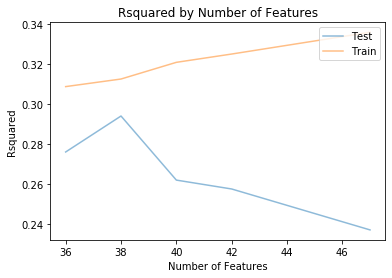

In [83]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [700, 600, 500, 400, 300, 200, 100, 50]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [84]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
33,room_type_Private room,-69.771828,69.771828
34,bed_type_Real Bed,40.573045,40.573045
29,host_has_profile_pic_t,37.743681,37.743681
5,bathrooms,35.193740,35.193740
6,bedrooms,27.775704,27.775704
32,property_type_House,-27.023626,27.023626
23,review_scores_location,14.019317,14.019317
28,host_response_time_within an hour,-13.442376,13.442376
37,cancellation_policy_strict,-13.054516,13.054516
24,review_scores_value,-11.701936,11.701936


## Check Most Important 3 Features

In [99]:
lis.groupby(by=['room_type']).count()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,1870,1870,1870,2127,2127,2127,2127,2127,2127,2125,2127,2123,2117,2126,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,1641,1637,1638,1637,1638,1635,1637,2127,2127,2127,2127,2127,1672
Private room,1176,1176,1176,1378,1378,1378,1378,1378,1378,1377,1378,1369,1378,1370,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378,1078,1072,1076,1075,1076,1075,1074,1378,1378,1378,1378,1378,1101
Shared room,68,68,68,80,80,80,80,80,80,80,80,79,80,80,80,80,80,80,80,80,80,80,80,80,80,80,53,53,53,53,53,53,53,80,80,80,80,80,56


In [100]:
lis.groupby(by=['bed_type']).count()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
bed_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Airbed,37,37,37,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,29,29,29,29,29,29,29,40,40,40,40,40,29
Couch,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6,6,6,6,6,6,6,10,10,10,10,10,6
Futon,42,42,42,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,48,48,48,48,48,48,48,51,51,51,51,51,49
Pull-out Sofa,28,28,28,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,27,27,27,27,27,27,26,31,31,31,31,31,27
Real Bed,2998,2998,2998,3453,3453,3453,3453,3453,3453,3450,3453,3453,3439,3443,3444,3453,3453,3453,3453,3453,3453,3453,3453,3453,3453,3453,2662,2652,2657,2655,2657,2653,2655,3453,3453,3453,3453,3453,2718


In [101]:
# because percentage of t is very high, we can remove this feature from this list.
lis.groupby(by=['host_has_profile_pic']).count()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
host_has_profile_pic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,5,5,5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,6,6,6,6,6,6,8,8,8,8,8,7
t,3109,3109,3109,3577,3577,3577,3577,3577,3574,3577,3577,3563,3567,3568,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,3577,2765,2756,2761,2759,2761,2757,2758,3577,3577,3577,3577,3577,2822


In [98]:
lis.groupby(by=['bathrooms']).count()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
bathrooms,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,11,11,11,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,9,9,9,9,9,9,9,13,13,13,13,13,9
0.5,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,5,5,5,5,5,5,7,7,7,7,7,7
1.0,2376,2376,2376,2751,2751,2751,2751,2751,2751,2748,2751,2751,2741,2747,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2146,2136,2141,2139,2141,2137,2138,2751,2751,2751,2751,2751,2187
1.5,177,177,177,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,172,172,172,172,172,172,172,208,208,208,208,208,176
2.0,426,426,426,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,335,335,335,335,335,335,335,478,478,478,478,478,345
2.5,62,62,62,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,56,56,56,56,56,56,56,68,68,68,68,68,56
3.0,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,16,16,16,16,16,16,16,21,21,21,21,21,16
3.5,11,11,11,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,12,12,12,12,12,12,12,13,13,13,13,13,12
4.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
